Анализ данных авиабилетов Aviasales


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file = "D:\DataScience\data\processed/all_routes_filtered/all_routes_filtered.json"

Аналитическая часть


In [2]:
df = pd.read_json(file, lines=True)

In [3]:
df.head()

,depart_date,gate,found_at,trip_class,value,number_of_changes,duration,distance,origin_airport,destination_airport,airline,origin_airport_name,origin_city_code,destination_airport_name,destination_city_code
0,2025-01-19T20:25:00+07:00,,2024-11-25 09:38:30,0,12531,1,1105.0,3865,ABA,AER,KV,Abakan Airport,ABA,Sochi International Airport,AER
1,2025-01-30T22:55:00+07:00,,2024-11-25 10:00:09,0,13020,1,975.0,3865,ABA,AER,KV,Abakan Airport,ABA,Sochi International Airport,AER
2,2025-02-04T22:55:00+07:00,,2024-11-23 02:32:28,0,14893,1,1535.0,3865,ABA,AER,KV,Abakan Airport,ABA,Sochi International Airport,AER
3,2024-12-08T20:25:00+07:00,OneTwoTrip,2024-11-25 12:18:38,0,14954,1,1105.0,3865,ABA,AER,KV,Abakan Airport,ABA,Sochi International Airport,AER
4,2024-12-10T22:55:00+07:00,Kupi.com,2024-11-25 13:30:44,0,15087,1,1535.0,3865,ABA,AER,KV,Abakan Airport,ABA,Sochi International Airport,AER


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571487 entries, 0 to 571486
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   depart_date               571487 non-null  object        
 1   gate                      571487 non-null  object        
 2   found_at                  571487 non-null  datetime64[ns]
 3   trip_class                571487 non-null  int64         
 4   value                     571487 non-null  int64         
 5   number_of_changes         571487 non-null  int64         
 6   duration                  463273 non-null  float64       
 7   distance                  571487 non-null  int64         
 8   origin_airport            463273 non-null  object        
 9   destination_airport       463273 non-null  object        
 10  airline                   463273 non-null  object        
 11  origin_airport_name       571487 non-null  object        
 12  or

In [5]:
df.describe()

,found_at,trip_class,value,number_of_changes,duration,distance
count,571487,571487.0,571487.000000,571487.000000,463273.000000,571487.000000
mean,2024-11-23 19:18:40.033324032,0.0,18055.881275,0.933206,1020.154630,2361.454404
min,2024-11-18 13:48:40,0.0,1188.000000,0.000000,30.000000,35.000000
25%,2024-11-22 23:55:18,0.0,11050.000000,1.000000,435.000000,1185.000000
50%,2024-11-23 12:19:21,0.0,15279.000000,1.000000,795.000000,1899.000000
75%,2024-11-25 01:57:55.500000,0.0,22997.000000,1.000000,1400.000000,3115.000000
max,2024-11-26 02:41:02,0.0,461643.000000,5.000000,6055.000000,7866.000000
std,NaN,0.0,10838.053721,0.500834,799.761851,1629.410085


Выводы:
Минимальное значение цены за авиабилет = 1188 рублей, а максимальное 461643 рубля. Это свидетельсвтует о том, что данные полученные из кэша, не являются акутальными, поскольку самый дешевый билет не может стоить так много для любого направления в России. Далее будем считать выбросами те записи, где значение цены составляет больше mean + 3*std

In [6]:
value_3z = df["value"].mean() + 3 *df["value"].std()
print(f"Значение цены, выше которой билеты не будут учитываться в общей статистике =   {round(value_3z)}")

Значение цены, выше которой билеты не будут учитываться в общей статистике =   50570


Далее рассмотрим записи, который являются выбросами

In [7]:
df_filtered = df[df['value'] > value_3z]
df_filtered


,depart_date,gate,found_at,trip_class,value,number_of_changes,duration,distance,origin_airport,destination_airport,airline,origin_airport_name,origin_city_code,destination_airport_name,destination_city_code
314,2025-01-03T09:55:00+07:00,,2024-11-22 23:56:49,0,51880,1,NaN,3865,None,None,None,Abakan Airport,ABA,Sochi International Airport,AER
356,2025-01-08T09:55:00+07:00,,2024-11-23 09:58:53,0,59340,1,1030.0,3035,ABA,ARH,SU,Abakan Airport,ABA,Talagi Airport,ARH
549,2025-01-04T09:55:00+07:00,,2024-11-25 12:58:33,0,52566,2,NaN,2454,None,None,None,Abakan Airport,ABA,Blagoveschensk Airport,BQS
550,2025-01-11T09:55:00+07:00,,2024-11-22 12:29:29,0,55949,2,NaN,2454,None,None,None,Abakan Airport,ABA,Blagoveschensk Airport,BQS
639,2025-01-03T09:55:00+07:00,,2024-11-22 21:09:46,0,51928,1,NaN,1928,None,None,None,Abakan Airport,ABA,Chelyabinsk International Airport,CEK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571429,2024-11-26T08:10:00+03:00,Aviakassa,2024-11-25 17:12:23,0,73586,3,2355.0,4873,ZIA,YKS,WZ,Zhukovsky International Airport,MOW,Yakutsk Airport,YKS
571430,2024-11-22T23:15:00+03:00,Kupi.com,2024-11-22 18:05:52,0,82397,2,NaN,4873,None,None,None,Zhukovsky International Airport,MOW,Yakutsk Airport,YKS
571431,2024-12-05T17:35:00+09:00,,2024-11-24 07:54:38,0,58558,1,2605.0,4371,ZIX,VKO,PI,Zhigansk Airport,ZIX,Vnukovo Airport,MOW
571432,2024-12-16T18:35:00+09:00,City.Travel,2024-11-22 03:24:09,0,65567,1,2515.0,4371,ZIX,VKO,ЯП,Zhigansk Airport,ZIX,Vnukovo Airport,MOW


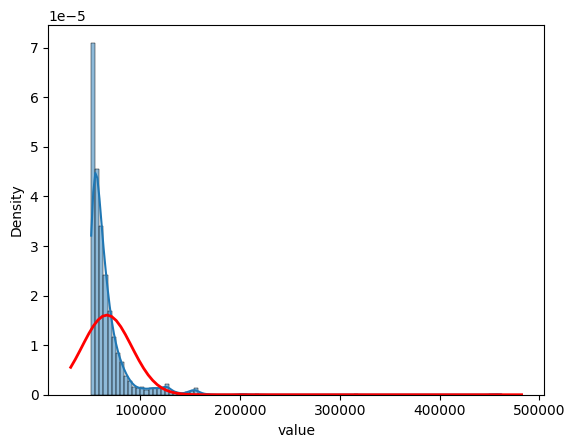

In [8]:
# Гистограмма по цене для выбросов
from scipy.stats import norm 
target_filtered = df_filtered["value"]
ax = sns.histplot(target_filtered, stat = "density", kde = True, bins = 100)
x0,x1 = ax.get_xlim()
x_pdf = np.linspace(x0,x1,100)
params = norm.fit(target_filtered)

y_pdf = norm.pdf(x_pdf,*params)
ax.plot(x_pdf, y_pdf, 'r', lw=2)

In [9]:
df = df[df["value"] <= value_3z]
df.describe()


,found_at,trip_class,value,number_of_changes,duration,distance
count,563534,563534.0,563534.000000,563534.000000,457852.000000,563534.000000
mean,2024-11-23 19:24:50.712836608,0.0,17375.254226,0.923224,1009.165497,2337.371972
min,2024-11-18 13:48:40,0.0,1188.000000,0.000000,30.000000,35.000000
25%,2024-11-23 00:00:09,0.0,10993.250000,1.000000,435.000000,1176.000000
50%,2024-11-23 12:19:14,0.0,15145.000000,1.000000,785.000000,1884.000000
75%,2024-11-25 01:54:20.500000,0.0,22526.000000,1.000000,1385.000000,3085.000000
max,2024-11-26 02:41:02,0.0,50570.000000,5.000000,6045.000000,7866.000000
std,NaN,0.0,8782.914013,0.490141,791.683357,1613.932706


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 563534 entries, 0 to 571486
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   depart_date               563534 non-null  object        
 1   gate                      563534 non-null  object        
 2   found_at                  563534 non-null  datetime64[ns]
 3   trip_class                563534 non-null  int64         
 4   value                     563534 non-null  int64         
 5   number_of_changes         563534 non-null  int64         
 6   duration                  457852 non-null  float64       
 7   distance                  563534 non-null  int64         
 8   origin_airport            457852 non-null  object        
 9   destination_airport       457852 non-null  object        
 10  airline                   457852 non-null  object        
 11  origin_airport_name       563534 non-null  object        
 12  origin_

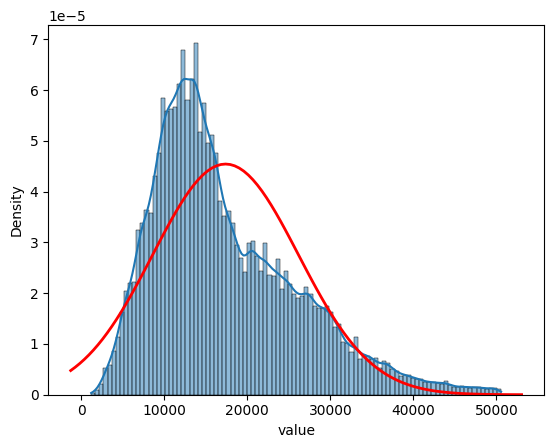

In [11]:
# Гистограмма по цене
from scipy.stats import norm 
target = df["value"]
ax = sns.histplot(target, stat = "density", kde = True, bins = 100)
x0,x1 = ax.get_xlim()
x_pdf = np.linspace(x0,x1,100)
params = norm.fit(target)

y_pdf = norm.pdf(x_pdf,*params)
ax.plot(x_pdf, y_pdf, 'r', lw=2)

В полученном датасете, для более чем ста тысяч записей отсутствует информация о продолжительности полета, коде аэропортов и перевозчиках. 

Для последующей статистики будем использовать коды городов, а не коды аэропортов. Коды аэропортов можно исключить из датасета

In [12]:
columns_to_keep = [
    
    "depart_date",
    "gate",
    "found_at",
    "trip_class",
    "value",
    "number_of_changes",
    "duration",
    "distance",
    "airline",
    "origin_city_code",
    "origin_airport_name",
    "destination_airport_name",
    "destination_city_code"
]

df = df[columns_to_keep]


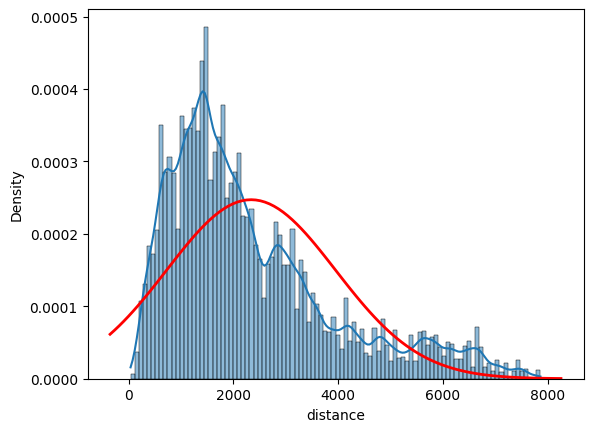

In [13]:
# Гистограмма по расстоянию
from scipy.stats import norm 
target = df["distance"]
ax = sns.histplot(target, stat = "density", kde = True, bins = 100)
x0,x1 = ax.get_xlim()
x_pdf = np.linspace(x0,x1,100)
params = norm.fit(target)

y_pdf = norm.pdf(x_pdf,*params)
ax.plot(x_pdf, y_pdf, 'r', lw=2)

In [14]:
df['duration'] = df['duration'].fillna(0).round().astype(int)
df = df[df["duration"] != 0]

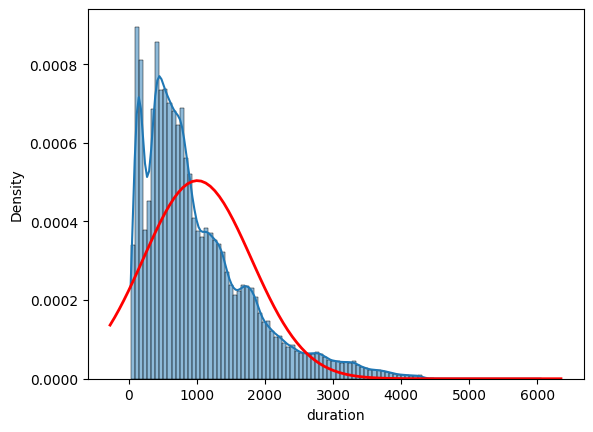

In [15]:
## Гистограмма по времени перелета
from scipy.stats import norm
target = df['duration']
ax = sns.histplot(round(target), stat = "density", kde = True, bins = 100)
x0,x1 = ax.get_xlim()
x_pdf = np.linspace(x0,x1,100)
params = norm.fit(target)

y_pdf = norm.pdf(x_pdf,*params)
ax.plot(x_pdf, y_pdf, 'r', lw=2)

1. Определение зависимости цены билета от месяца


C:\Users\artem\AppData\Local\Temp\ipykernel_3136\3909208938.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['depart_date'] = pd.to_datetime(df['depart_date'], utc=True)
C:\Users\artem\AppData\Local\Temp\ipykernel_3136\3909208938.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


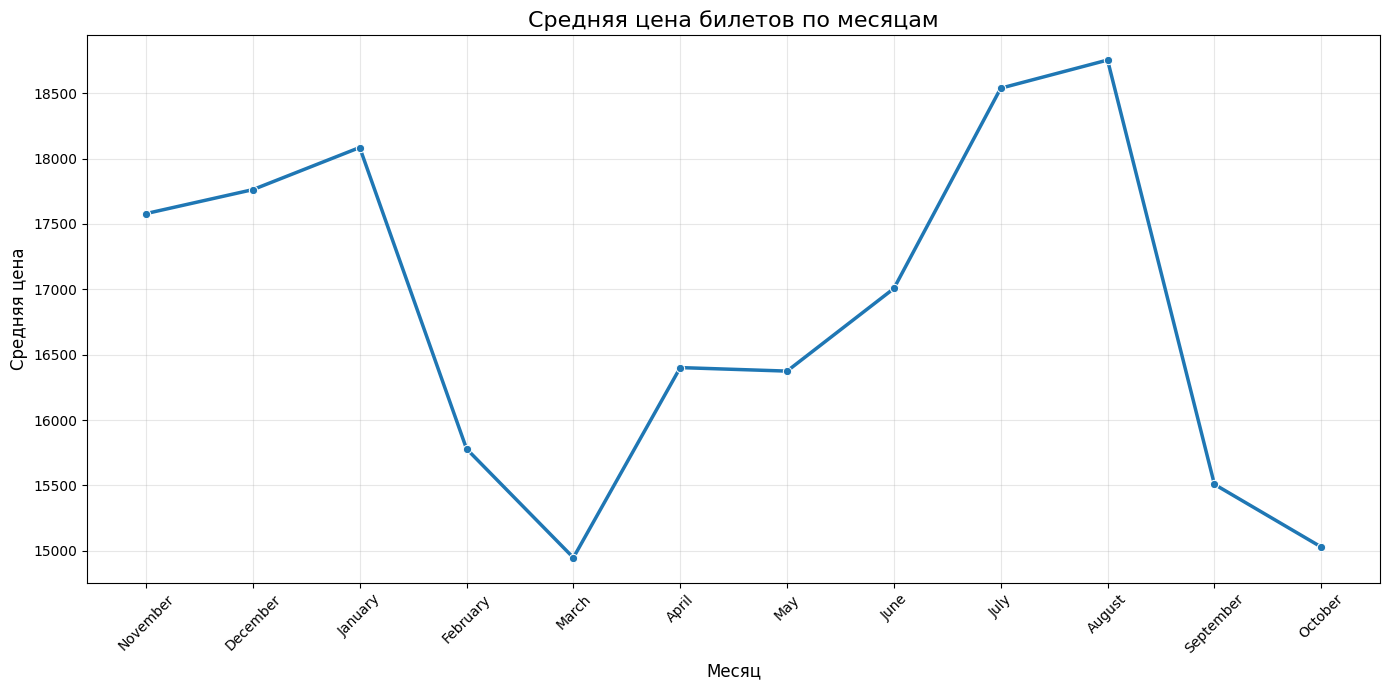

In [16]:
df['depart_date'] = pd.to_datetime(df['depart_date'], utc=True)

df['month'] = df['depart_date'].dt.month
df['year'] = df['depart_date'].dt.year

monthly_prices = df.groupby(['year', 'month'])['value'].mean().reset_index()

monthly_prices["month_name"] = pd.to_datetime(
    monthly_prices["month"], format="%m"
).dt.month_name()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_prices,
    x = 'month_name',
    y = 'value',
    
    marker= "o",
    palette='viridis',
    linewidth = 2.5
)

plt.title("Средняя цена билетов по месяцам", fontsize = 16)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Средняя цена", fontsize= 12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Исходя из полученного графика, можно сделать вывод, что цена на билеты максимальна в период новогодних праздников, а также последних летних месяцев. Это объсняется тем, что в эти периоды наблюдается наибольший спрос на перелеты.


2. Определение самых дорогих и самых дешевых авиакомпаний


Определим самые дорогие и самые дешевые авикомпании. Ограничимся только компаниями, которые совершают более 10 000 перелетов за год.

In [17]:
airlines_range = df.groupby('airline').agg(mean_price = ('value', 'mean'), flights_count = ('value', 'count')).reset_index()
airlines_range = airlines_range[airlines_range['flights_count']>10000]
airlines_range.sort_values('mean_price')


,airline,mean_price,flights_count
5,A4,11243.944059,11530
32,WZ,13320.694980,19202
2,5N,13725.002819,12061
31,UT,14289.690527,47009
24,N4,14484.256695,15684
10,DP,14888.151180,56469
13,FV,15400.931909,18108
29,SU,19107.962406,181333
28,S7,19786.738210,15203
30,U6,20495.523165,14850


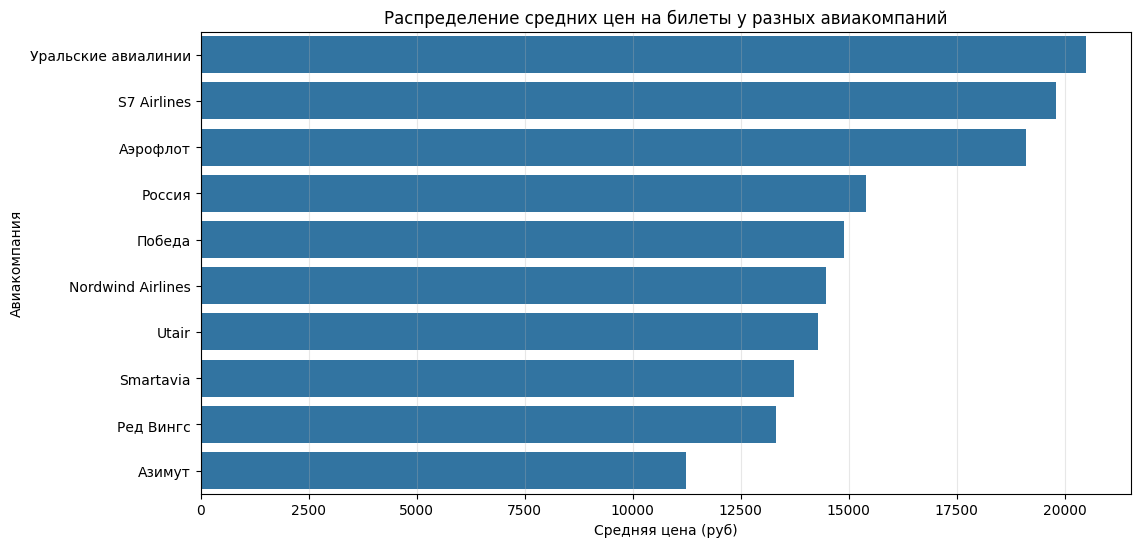

In [18]:
top = airlines_range.sort_values('mean_price', ascending=False)

airlines_file = 'D:\DataScience\data/airlines.json'
names_airlines = pd.read_json(airlines_file, lines=True)

airlines_dict = dict(zip(names_airlines['code'], names_airlines['name']))
airlines_range['airline'] = airlines_range['airline'].replace(airlines_dict)


top = airlines_range.sort_values('mean_price', ascending=False)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=top, x='mean_price', y='airline')
plt.title('Распределение средних цен на билеты у разных авиакомпаний')
plt.xlabel('Средняя цена (руб)')
plt.ylabel('Авиакомпания')
plt.grid(axis='x', alpha=0.3)
plt.show()



Также посмотрим, какие авиакомпании совершают больше всего перелетов по России

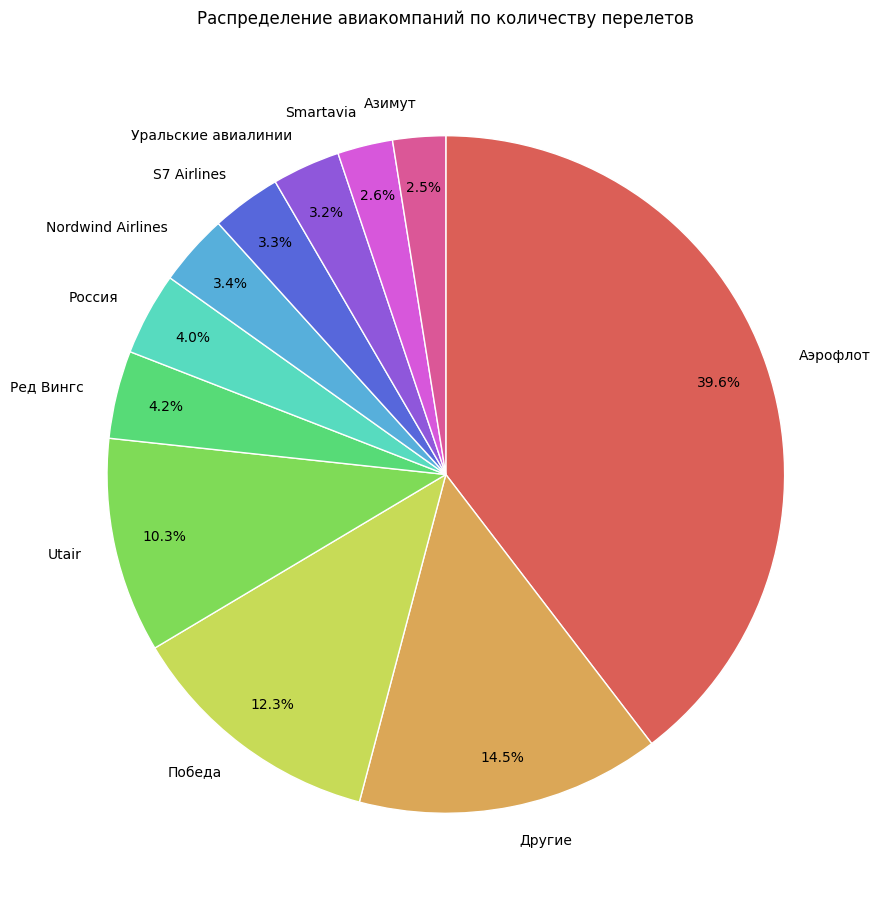

In [19]:
airlines_flights = df.groupby('airline').agg(flights_count = ('value', 'count')).reset_index()
airlines_flights['airline'] = airlines_flights['airline'].replace(airlines_dict)

airlines_flights['category'] = airlines_flights['airline']
airlines_flights.loc[airlines_flights['flights_count']<10000, 'category'] = 'Другие'
category_counts = airlines_flights.groupby('category')['flights_count'].sum().reset_index()


category_counts = category_counts.sort_values('flights_count', ascending=False)

plt.figure(figsize=(11, 11))
plt.pie(
    category_counts['flights_count'],
    labels=category_counts['category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('hls', len(category_counts)),
    wedgeprops={'edgecolor': 'white'},
    counterclock=False, 
    pctdistance=0.85
)


plt.title('Распределение авиакомпаний по количеству перелетов', pad=20)
plt.show()

3. Определение самых популярных и самых непопулярных направлений.

In [20]:

unique_flights = df.drop_duplicates(
    subset=['origin_city_code', 'destination_city_code', 'origin_airport_name', 'depart_date'])

popular_directions = unique_flights.groupby(['origin_city_code', 'destination_city_code', 'origin_airport_name', 'destination_airport_name']).agg(
    total_days=('depart_date', 'count')).reset_index()

top_directions = popular_directions.sort_values('total_days', ascending=False)
top_directions.head(10)

,origin_city_code,destination_city_code,origin_airport_name,destination_airport_name,total_days
7443,SGC,UFA,Surgut Airport,Ufa International Airport,323
4374,MOW,SCW,Vnukovo Airport,Syktyvkar Airport,317
4047,MOW,CSY,Sheremetyevo International Airport,Cheboksary Airport,316
7740,SVX,HTA,Koltsovo International Airport,Chita Airport,316
3669,LED,SCW,Pulkovo Airport,Syktyvkar Airport,315
7724,SVX,BQS,Koltsovo International Airport,Blagoveschensk Airport,314
1731,HTA,SVX,Chita Airport,Koltsovo International Airport,311
4334,MOW,PEZ,Sheremetyevo International Airport,Penza Airport,311
7287,SCW,LED,Syktyvkar Airport,Pulkovo Airport,309
5832,OGZ,MOW,Vladikavkaz Airport,Vnukovo Airport,309


Как можно видеть в таблице, самым популярным местом и в пункте отправления и в пункте прибытия является город Москва. Рассмотрим самые популярные маршруты, куда чаще всего улетают из Москвы

In [21]:
MOW_routes = top_directions[top_directions['origin_city_code']=='MOW']
MOW_routes.head(10)

,origin_city_code,destination_city_code,origin_airport_name,destination_airport_name,total_days
4374,MOW,SCW,Vnukovo Airport,Syktyvkar Airport,317
4047,MOW,CSY,Sheremetyevo International Airport,Cheboksary Airport,316
4334,MOW,PEZ,Sheremetyevo International Airport,Penza Airport,311
4314,MOW,OSW,Sheremetyevo International Airport,Orsk Airport,309
4295,MOW,OGZ,Vnukovo Airport,Vladikavkaz Airport,309
4353,MOW,REN,Sheremetyevo International Airport,Orenburg Airport,294
4026,MOW,BQS,Moscow Domodedovo Airport,Blagoveschensk Airport,291
4436,MOW,UCT,Vnukovo Airport,Ukhta Airport,275
3999,MOW,ABA,Sheremetyevo International Airport,Abakan Airport,268
4097,MOW,HMA,Sheremetyevo International Airport,Khanty-Mansiysk Airport,267


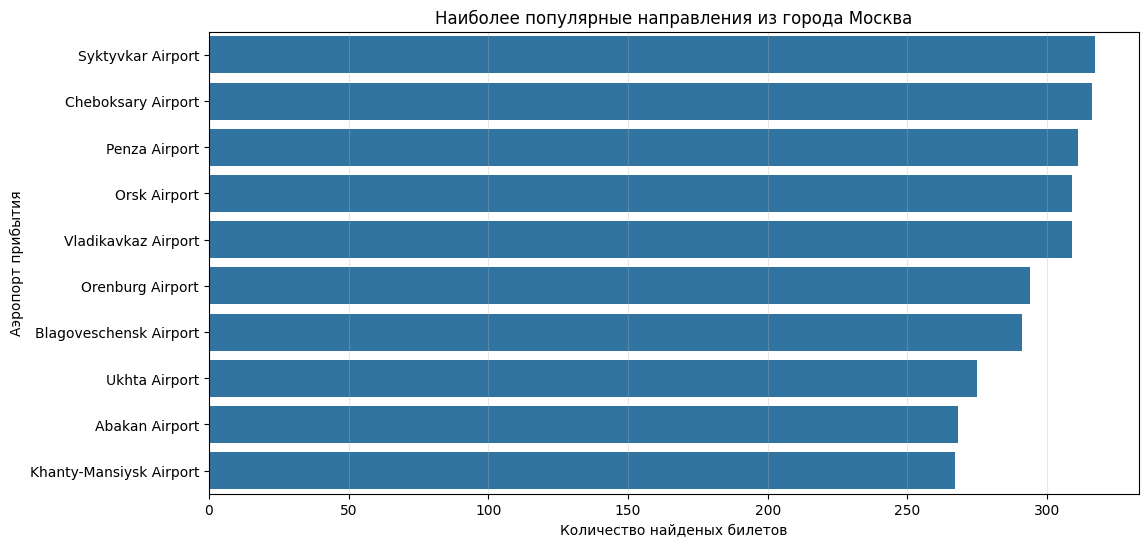

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=MOW_routes.head(10), x='total_days', y='destination_airport_name')
plt.title('Наиболее популярные направления из города Москва')
plt.xlabel('Количество найденых билетов')
plt.ylabel('Аэропорт прибытия')
plt.grid(axis='x', alpha=0.3)
plt.show()



Также рассмотрим в какие города наибольший спрос из Санкт-Петербурга

In [23]:
LED_routes = top_directions[top_directions['origin_city_code']=='LED']
LED_routes.head(10)

,origin_city_code,destination_city_code,origin_airport_name,destination_airport_name,total_days
3669,LED,SCW,Pulkovo Airport,Syktyvkar Airport,315
3604,LED,IJK,Pulkovo Airport,Izhevsk Airport,304
3665,LED,REN,Pulkovo Airport,Orenburg Airport,297
3599,LED,HTA,Pulkovo Airport,Chita Airport,296
3671,LED,SGC,Pulkovo Airport,Surgut Airport,287
3626,LED,MCX,Pulkovo Airport,Makhachkala Airport,281
3639,LED,NJC,Pulkovo Airport,Nizhnevartovsk Airport,264
3577,LED,BQS,Pulkovo Airport,Blagoveschensk Airport,260
3650,LED,OGZ,Pulkovo Airport,Vladikavkaz Airport,258
3689,LED,UFA,Pulkovo Airport,Ufa International Airport,257


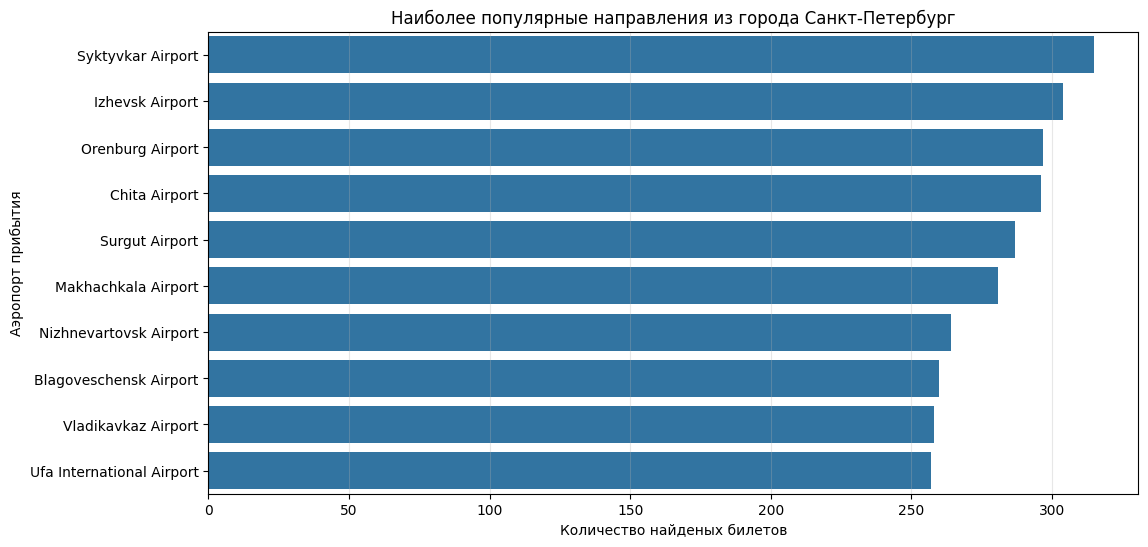

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=LED_routes.head(10), x='total_days', y='destination_airport_name')
plt.title('Наиболее популярные направления из города Санкт-Петербург')
plt.xlabel('Количество найденых билетов')
plt.ylabel('Аэропорт прибытия')
plt.grid(axis='x', alpha=0.3)
plt.show()



Теперь определим топ популярных маршрутов по России, не включая Москву и Санкт-Петербург


In [25]:
RU_routes = top_directions[(top_directions['origin_city_code']!='MOW') & (top_directions['origin_city_code']!='LED')]

RU_routes['way'] = (RU_routes['origin_airport_name'] + ' -> ' + RU_routes['destination_airport_name'])
RU_routes.head(10)

C:\Users\artem\AppData\Local\Temp\ipykernel_3136\1115825360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RU_routes['way'] = (RU_routes['origin_airport_name'] + ' -> ' + RU_routes['destination_airport_name'])


,origin_city_code,destination_city_code,origin_airport_name,destination_airport_name,total_days,way
7443,SGC,UFA,Surgut Airport,Ufa International Airport,323,Surgut Airport -> Ufa International Airport
7740,SVX,HTA,Koltsovo International Airport,Chita Airport,316,Koltsovo International Airport -> Chita Airport
7724,SVX,BQS,Koltsovo International Airport,Blagoveschensk Airport,314,Koltsovo International Airport -> Blagoveschen...
1731,HTA,SVX,Chita Airport,Koltsovo International Airport,311,Chita Airport -> Koltsovo International Airport
7287,SCW,LED,Syktyvkar Airport,Pulkovo Airport,309,Syktyvkar Airport -> Pulkovo Airport
5832,OGZ,MOW,Vladikavkaz Airport,Vnukovo Airport,309,Vladikavkaz Airport -> Vnukovo Airport
603,BQS,KJA,Blagoveschensk Airport,Krasnoyarsk International Airport,307,Blagoveschensk Airport -> Krasnoyarsk Internat...
996,CSY,MOW,Cheboksary Airport,Sheremetyevo International Airport,306,Cheboksary Airport -> Sheremetyevo Internation...
7293,SCW,MOW,Syktyvkar Airport,Vnukovo Airport,306,Syktyvkar Airport -> Vnukovo Airport
2771,KJA,MOW,Krasnoyarsk International Airport,Vnukovo Airport,306,Krasnoyarsk International Airport -> Vnukovo A...


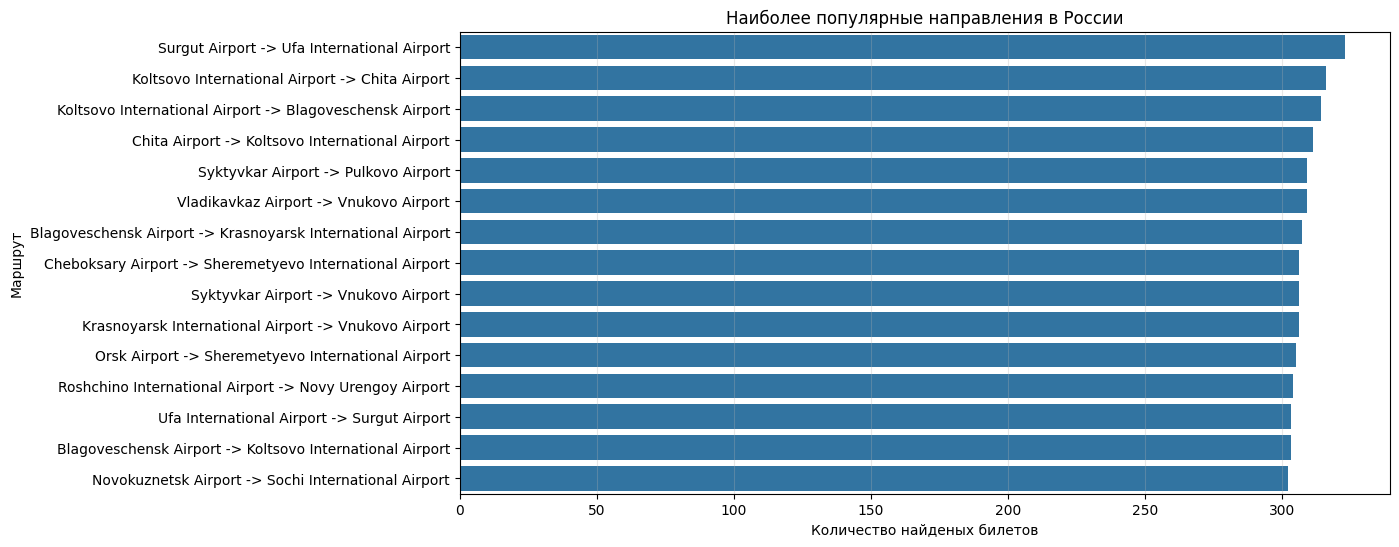

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=RU_routes.head(15), x='total_days', y='way')
plt.title('Наиболее популярные направления в России')
plt.xlabel('Количество найденых билетов')
plt.ylabel('Маршрут')
plt.grid(axis='x', alpha=0.3)
plt.show()



Прогностическая часть

R²: 0.70
MAE: 3050.76 руб.


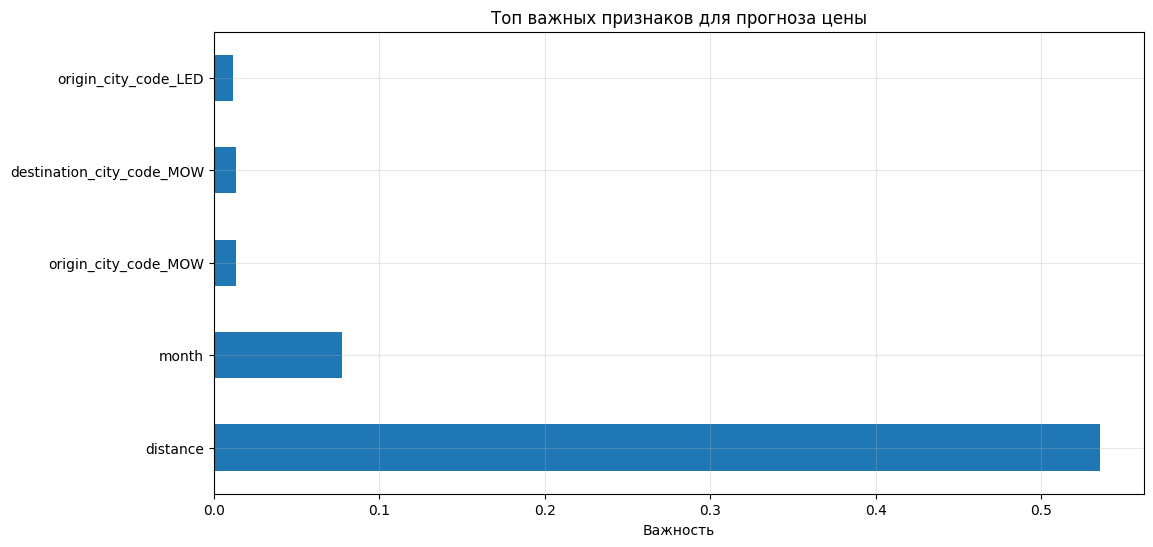

In [27]:
df['depart_date'] = pd.to_datetime(df['depart_date'])
df['month'] = df['depart_date'].dt.month



df = df.dropna(subset=['duration', 'airline', 'distance'])
features = [
     'month',
    'distance', 
    'origin_city_code', 
    'destination_city_code'
]

target = 'value'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Определение типов признаков
numeric_features = ['month', 'distance']
categorical_features = ['origin_city_code', 'destination_city_code']

# Создание пайплайна
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, r2_score

# Предсказание на тестовых данных
y_pred = pipeline.predict(X_test)

# Метрики
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} руб.")


# Получение важности признаков
feature_importances = pipeline.named_steps['regressor'].feature_importances_
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)


plt.figure(figsize=(12, 6))
pd.Series(feature_importances, index=all_features).nlargest().plot(kind='barh')
plt.title('Топ важных признаков для прогноза цены')
plt.xlabel('Важность')
plt.grid(alpha=0.3)
plt.show()


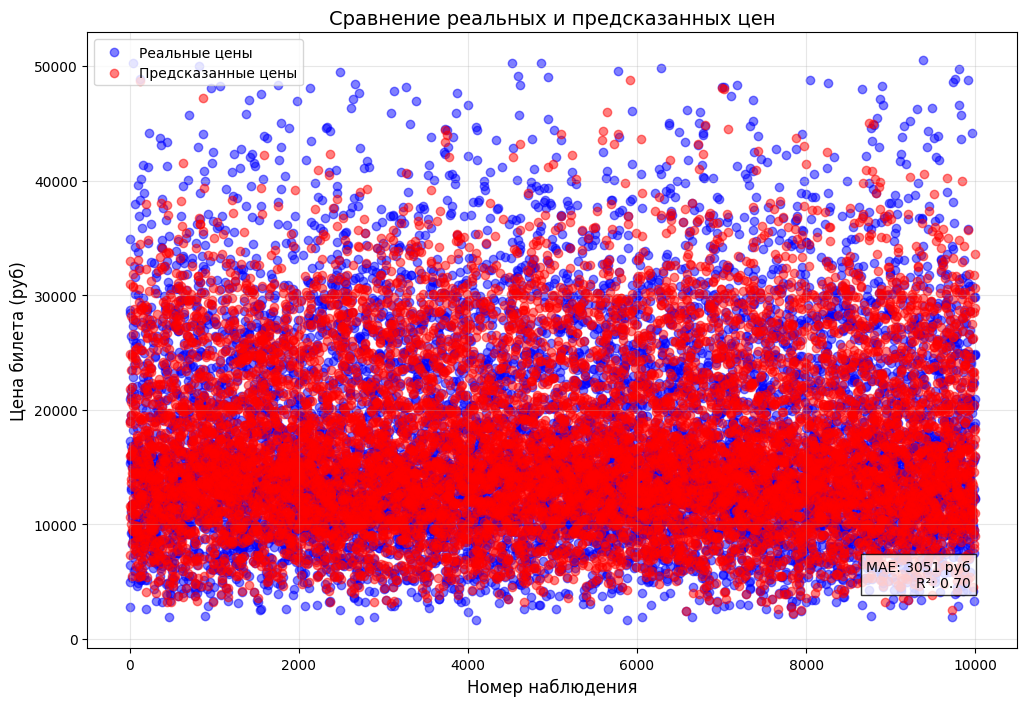

In [28]:
plt.figure(figsize=(12, 8))

sample_indices = np.arange(10000)

# Отображаем реальные цены синим
plt.scatter(
    sample_indices, 
    y_test.iloc[sample_indices], 
    color='blue',
    alpha=0.5,
    label='Реальные цены'
)

# Отображаем предсказанные цены красным
plt.scatter(
    sample_indices, 
    y_pred[sample_indices], 
    color='red',
    alpha=0.5,
    label='Предсказанные цены'
)

# Настройка графика
plt.title('Сравнение реальных и предсказанных цен', fontsize=14)
plt.xlabel('Номер наблюдения', fontsize=12)
plt.ylabel('Цена билета (руб)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Добавляем информацию о метриках
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.text(
    0.95, 0.1, 
    f'MAE: {mae:.0f} руб\nR²: {r2:.2f}', 
    transform=plt.gca().transAxes,
    ha='right',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.show()

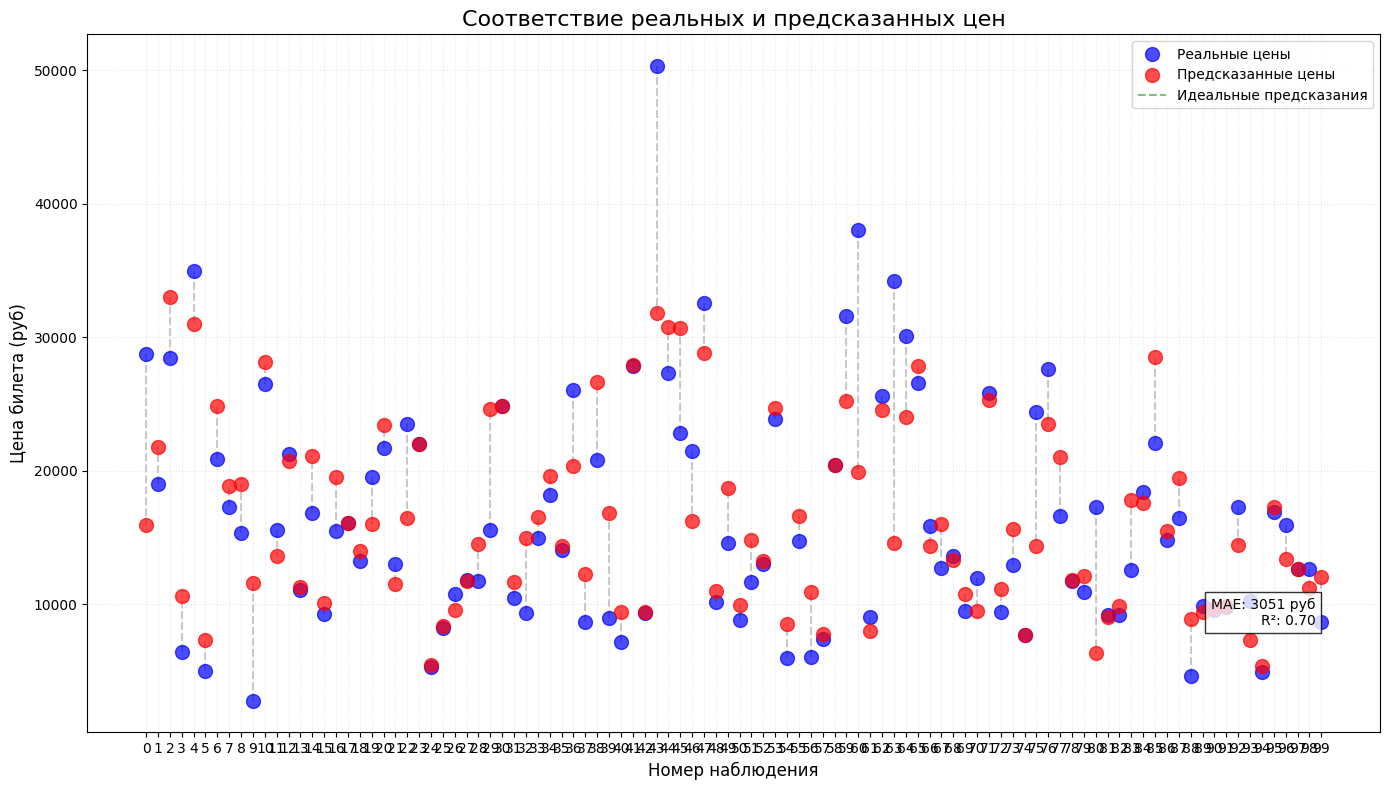

In [31]:
import matplotlib.pyplot as plt
import numpy as np


sample_size = 100
indices = np.arange(sample_size)

# Получаем реальные и предсказанные цены для выборки
y_test_sample = y_test.iloc[:sample_size].values
y_pred_sample = y_pred[:sample_size]

plt.figure(figsize=(14, 8))

for i in indices:
    plt.plot(
        [i, i], 
        [y_test_sample[i], y_pred_sample[i]], 
        color='gray', 
        alpha=0.4,
        linestyle='--'
    )

# Отображаем реальные цены
plt.scatter(
    indices, 
    y_test_sample, 
    color='blue', 
    s=100, 
    alpha=0.7, 
    label='Реальные цены',
    zorder=3 
)

# Отображаем предсказанные цены
plt.scatter(
    indices, 
    y_pred_sample, 
    color='red', 
    s=100, 
    alpha=0.7, 
    label='Предсказанные цены',
    zorder=3
)

# Настройка оформления
plt.title('Соответствие реальных и предсказанных цен', fontsize=16)
plt.xlabel('Номер наблюдения', fontsize=12)
plt.ylabel('Цена билета (руб)', fontsize=12)
plt.xticks(indices)
plt.grid(alpha=0.3, linestyle=':')
plt.legend()

# Добавляем информацию о качестве модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.text(
    0.95, 0.15, 
    f'MAE: {mae:.0f} руб\nR²: {r2:.2f}', 
    transform=plt.gca().transAxes,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.8)
)

# Добавляем диагональ для идеальных предсказаний
xlim = plt.xlim()
ylim = plt.ylim()
max_val = max(max(y_test_sample), max(y_pred_sample)) * 1.1
plt.plot([0, max_val], [0, max_val], '--', color='green', alpha=0.5, label='Идеальные предсказания')

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.tight_layout()
plt.show()

Далее мы можем проверить вручную цены на какие-либо маршруты

In [45]:
# Создаем словарь с расстояниями между городами
distance_dict = df.drop_duplicates(
    ['origin_city_code', 'destination_city_code']
).set_index(
    ['origin_city_code', 'destination_city_code']
)['distance'].to_dict()


origin = 'LED'
destination = 'STW'
month = 6

try:
    distance = distance_dict[(origin, destination)]
    
    print(f"Расстояние между {origin} и {destination}: {distance} км")
    print(f"Месяц - {month}")

    # Создаем DataFrame для предсказания
    sample_data = pd.DataFrame({
        'distance': [distance],
        'month': [month],
        'origin_city_code': [origin],
        'destination_city_code': [destination]
    })
    
    # Прогнозируем цену
    predicted_price = pipeline.predict(sample_data)
    print(f"Предсказанная цена: {predicted_price[0]:.2f} руб.")

except KeyError:
    print(f"Ошибка: Нет данных о расстоянии между {origin} и {destination}")

except Exception as e:
    print(f"Ошибка при прогнозировании: {str(e)}")
    
    
#Реальная цена

URL = f"https://www.aviasales.ru/search/{origin}010{month}{destination}300{month}1"


Расстояние между LED и STW: 1786 км
Месяц - 6
Предсказанная цена: 13824.68 руб.
